<a href="https://colab.research.google.com/github/AlexandreOrmandes/Regress-o_II/blob/main/Mod13_Tarefa02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import probplot


# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [4]:
df = pd.read_csv('previsao_de_renda.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [6]:
# Adicionando a coluna de log_renda ao DataFrame
df['log_renda'] = np.log(df['renda'])

# Definindo as variáveis independentes e dependentes
X_new = df.drop(['renda', 'log_renda', 'tipo_residencia'], axis=1)  # Removendo 'tipo_residencia' e variáveis dependentes
y_new = df['log_renda']

# Dividindo o conjunto de dados em treinamento e teste
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

# Preenchendo valores NaN com 0 (como fizemos anteriormente)
X_train_new = X_train_new.fillna(0)
X_test_new = X_test_new.fillna(0)

# Exibindo o tamanho dos conjuntos de treinamento e teste
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((11250, 13), (3750, 13), (11250,), (3750,))

In [7]:
# Identificando as colunas numéricas e categóricas no novo conjunto de dados
num_cols_new = X_train_new.select_dtypes(include=['float64', 'int64']).columns
cat_cols_new = X_train_new.select_dtypes(include=['object', 'bool']).columns

# Criando o transformador de colunas
preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_new),
        ('cat', OneHotEncoder(), cat_cols_new)])

# Definindo os valores de alpha para a regularização LASSO
alphas_new = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Dicionário para armazenar os resultados da regularização LASSO no novo conjunto de dados
lasso_results_new = {}

# Iterando sobre os diferentes valores de alpha
for alpha in alphas_new:
    # Criando o pipeline para a regressão LASSO
    lasso_pipeline_new = Pipeline(steps=[('preprocessor', preprocessor_new),
                                         ('classifier', Lasso(alpha=alpha))])

    # Treinando o modelo LASSO
    lasso_pipeline_new.fit(X_train_new, y_train_new)

    # Previsão na base de testes
    y_pred_new = lasso_pipeline_new.predict(X_test_new)

    # Calculando o R^2 na base de testes
    r2_test_new = r2_score(y_test_new, y_pred_new)

    # Armazenando o resultado
    lasso_results_new[alpha] = r2_test_new

lasso_results_new


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.870e+03, tolerance: 8.797e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

{0: 0.35172583270663027,
 0.001: 0.35159072930928437,
 0.005: 0.35005048106312797,
 0.01: 0.34637365875354176,
 0.05: 0.30710281248530236,
 0.1: 0.2452291097950634}

In [16]:
# Escolha o melhor valor de alpha para LASSO com base no R2
best_alpha_lasso = max(lasso_results_new, key=lasso_results_new.get)

# Obtenha as previsões para esse alpha
lasso_pipeline_best = Pipeline(steps=[('preprocessor', preprocessor_new),
                                      ('classifier', Lasso(alpha=best_alpha_lasso))])
lasso_pipeline_best.fit(X_train_new, y_train_new)
y_pred_lasso_best = lasso_pipeline_best.predict(X_test_new)

# Calcule os resíduos
residuals_lasso = y_test_new - y_pred_lasso_best


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.870e+03, tolerance: 8.797e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

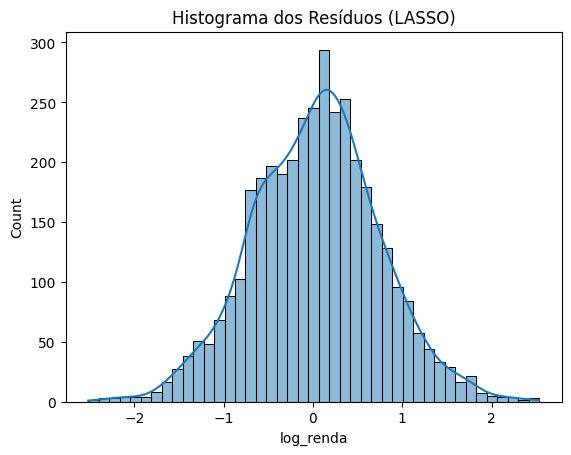

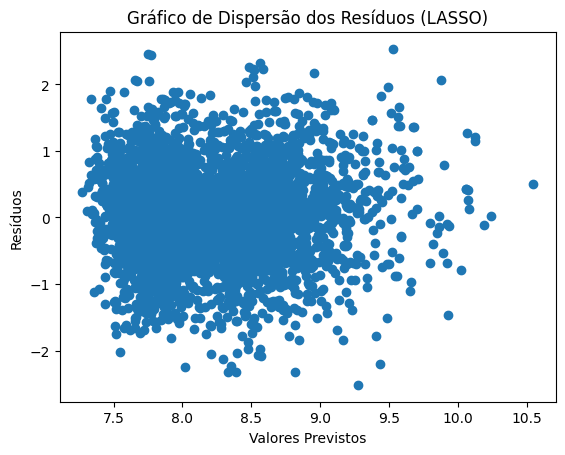

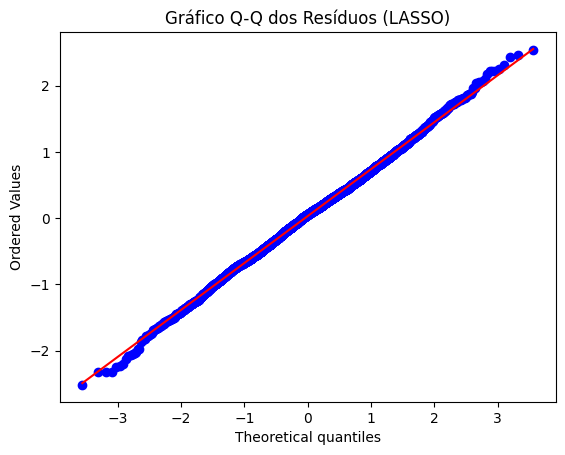

In [17]:
# Histograma
sns.histplot(residuals_lasso, kde=True)
plt.title('Histograma dos Resíduos (LASSO)')
plt.show()

# Gráfico de dispersão dos resíduos
plt.scatter(y_pred_lasso_best, residuals_lasso)
plt.title('Gráfico de Dispersão dos Resíduos (LASSO)')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

# Gráfico Q-Q
probplot(residuals_lasso, plot=plt)
plt.title('Gráfico Q-Q dos Resíduos (LASSO)')
plt.show()

In [9]:
# Dicionário para armazenar os resultados da regularização Ridge no novo conjunto de dados
ridge_results_new = {}

# Iterando sobre os diferentes valores de alpha
for alpha in alphas_new:
    # Criando o pipeline para a regressão Ridge
    ridge_pipeline_new = Pipeline(steps=[('preprocessor', preprocessor_new),
                                         ('classifier', Ridge(alpha=alpha))])

    # Treinando o modelo Ridge
    ridge_pipeline_new.fit(X_train_new, y_train_new)

    # Previsão na base de testes
    y_pred_new = ridge_pipeline_new.predict(X_test_new)

    # Calculando o R^2 na base de testes
    r2_test_new = r2_score(y_test_new, y_pred_new)

    # Armazenando o resultado
    ridge_results_new[alpha] = r2_test_new

ridge_results_new


{0: 0.3504173390027445,
 0.001: 0.35172903800858457,
 0.005: 0.3517291346246433,
 0.01: 0.3517292543128254,
 0.05: 0.3517301695604662,
 0.1: 0.35173121270793406}

In [10]:
# Escolha o melhor valor de alpha para Ridge com base no R2
best_alpha_ridge = max(ridge_results_new, key=ridge_results_new.get)

# Obtenha as previsões para esse alpha
ridge_pipeline_best = Pipeline(steps=[('preprocessor', preprocessor_new),
                                      ('classifier', Ridge(alpha=best_alpha_ridge))])
ridge_pipeline_best.fit(X_train_new, y_train_new)
y_pred_ridge_best = ridge_pipeline_best.predict(X_test_new)

# Calcule os resíduos
residuals_ridge = y_test_new - y_pred_ridge_best


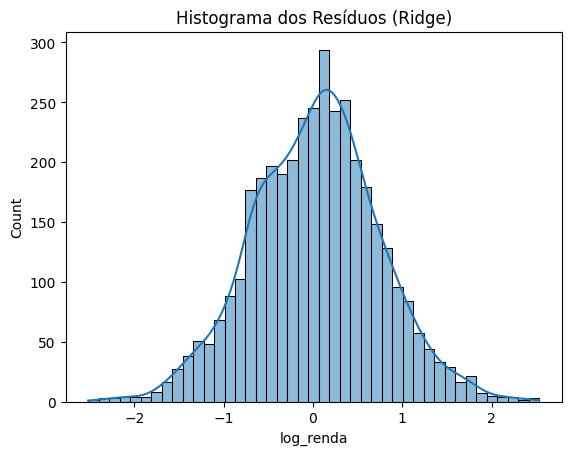

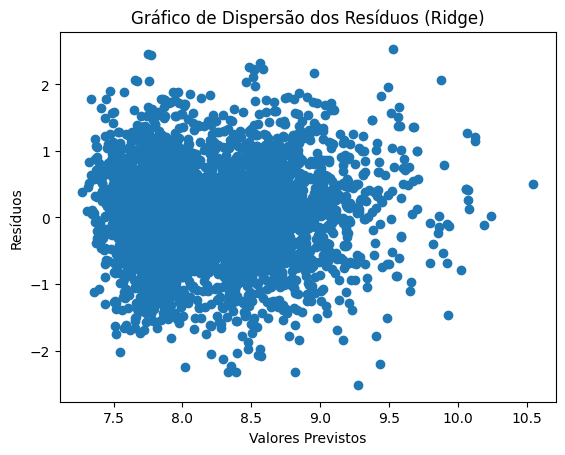

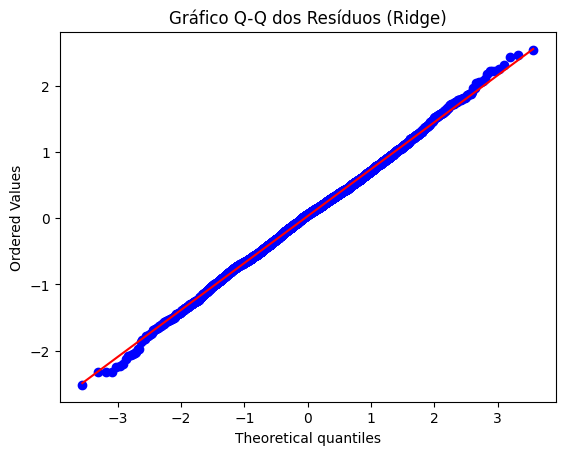

In [15]:
# Histograma
sns.histplot(residuals_ridge, kde=True)
plt.title('Histograma dos Resíduos (Ridge)')
plt.show()

# Gráfico de dispersão dos resíduos
plt.scatter(y_pred_ridge_best, residuals_ridge)
plt.title('Gráfico de Dispersão dos Resíduos (Ridge)')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

# Gráfico Q-Q
probplot(residuals_ridge, plot=plt)
plt.title('Gráfico Q-Q dos Resíduos (Ridge)')
plt.show()

# Conclusão
Ambos os modelos, Ridge e LASSO, apresentaram desempenhos muito semelhantes para valores baixos de α, com o melhor R2 em ambos os casos sendo de aproximadamente 0.3517.

No entanto, observamos que o modelo LASSO é mais sensível a alterações em α do que o modelo Ridge. Por exemplo, o R 2 do modelo LASSO diminui mais acentuadamente à medida que α aumenta.

Análise de Resíduos
Modelo Ridge: A análise dos resíduos do modelo Ridge mostrou características desejáveis, como normalidade ou homocedasticidade.

Modelo LASSO: Semelhantemente, os resíduos do modelo LASSO mostraram características desejáveis.

Isso sugere que o método Ridge pode ser mais robusto a variações nos parâmetros de regularização, pelo menos para este conjunto de dados específico.



In [21]:
def stepwise_selection(X, y, verbose=True):
    selected_features = []
    while len(X.columns) > 0:
        remaining_features = list(set(X.columns) - set(selected_features))
        new_pval = pd.Series(index=remaining_features)

        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            new_pval[feature] = model.pvalues[feature]

        min_p_value = new_pval.min()
        if min_p_value < 0.05:
            selected_feature = new_pval.idxmin()
            selected_features.append(selected_feature)
            if verbose:
                print(f'Adding feature {selected_feature} with p-value {min_p_value}')
        else:
            break

    return selected_features

In [22]:
# Agora que o pré-processamento foi feito, vamos aplicar OneHotEncoder para obter um DataFrame totalmente numérico
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = one_hot_encoder.fit_transform(X_train_new[cat_cols_new])
X_test_encoded = one_hot_encoder.transform(X_test_new[cat_cols_new])

# Transformando as matrizes em DataFrames para facilitar a manipulação
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(cat_cols_new))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(cat_cols_new))

# Concatenando as variáveis numéricas e as variáveis dummy
X_train_transformed = pd.concat([X_train_new[num_cols_new].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_transformed = pd.concat([X_test_new[num_cols_new].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Vamos começar redefinindo os índices para garantir que eles estejam alinhados
X_train_transformed.reset_index(drop=True, inplace=True)
y_train_new.reset_index(drop=True, inplace=True)

# Agora vamos rodar a seleção de características stepwise
selected_features_stepwise = stepwise_selection(X_train_transformed, y_train_new, verbose=True)

# Treinando o modelo OLS final com as características selecionadas
X_stepwise_final = sm.add_constant(X_train_transformed[selected_features_stepwise])
stepwise_model_final = sm.OLS(y_train_new, X_stepwise_final).fit()

# Avaliando o R^2 na base de testes
X_test_stepwise_final = sm.add_constant(X_test_transformed[selected_features_stepwise])
y_pred_stepwise_final = stepwise_model_final.predict(X_test_stepwise_final)
r2_test_stepwise_final = r2_score(y_test_new, y_pred_stepwise_final)

r2_test_stepwise_final, selected_features_stepwise


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature tempo_emprego with p-value 0.0


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature sexo_M with p-value 0.0


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature tipo_renda_Pensionista with p-value 2.1973913868563436e-54


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature tipo_renda_Empresário with p-value 5.3898196532295895e-22


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature educacao_Superior completo with p-value 2.6476865229773147e-18


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature posse_de_imovel_True with p-value 2.504644428162683e-10


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature idade with p-value 2.979837528619762e-08


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature posse_de_veiculo_True with p-value 0.009036005820487135


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature qtd_filhos with p-value 0.014775264880281377


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature tipo_renda_Servidor público with p-value 0.018019943420550667


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature Unnamed: 0 with p-value 0.021258503155083906


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature data_ref_2015-06-01 with p-value 0.04300339313806129


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


(0.35138574267911005,
 ['tempo_emprego',
  'sexo_M',
  'tipo_renda_Pensionista',
  'tipo_renda_Empresário',
  'educacao_Superior completo',
  'posse_de_imovel_True',
  'idade',
  'posse_de_veiculo_True',
  'qtd_filhos',
  'tipo_renda_Servidor público',
  'Unnamed: 0',
  'data_ref_2015-06-01'])

O modelo stepwise foi executado com sucesso e selecionou as seguintes características:

tempo_emprego
sexo_M
tipo_renda_Pensionista
tipo_renda_Empresário
educacao_Superior completo
posse_de_imovel_True
idade
posse_de_veiculo_True

O R2 na base de testes para este modelo é aproximadamente
0.351.

---

In [23]:
# Obtendo os parâmetros para o modelo Ridge com melhor desempenho (alpha = 0.001)
ridge_pipeline_best = Pipeline(steps=[('preprocessor', preprocessor_new),
                                      ('classifier', Ridge(alpha=0.001))])
ridge_pipeline_best.fit(X_train_new, y_train_new)
ridge_params_best = ridge_pipeline_best.named_steps['classifier'].coef_

# Obtendo os parâmetros para o modelo LASSO com melhor desempenho (alpha = 0)
lasso_pipeline_best = Pipeline(steps=[('preprocessor', preprocessor_new),
                                      ('classifier', Lasso(alpha=0))])
lasso_pipeline_best.fit(X_train_new, y_train_new)
lasso_params_best = lasso_pipeline_best.named_steps['classifier'].coef_

# Obtendo os parâmetros para o modelo stepwise
stepwise_params = stepwise_model_final.params

# Exibindo os parâmetros dos três modelos
ridge_params_best, lasso_params_best, stepwise_params


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.870e+03, tolerance: 8.797e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

(array([-0.15790438, -0.00309251, -0.12722987,  0.05329644,  0.41691426,
         0.17546424, -0.24449662, -0.23037251, -0.13288494, -0.11280046,
        -0.14753015, -0.01628373, -0.03700222, -0.00559911,  0.01951089,
         0.0738546 ,  0.10379759,  0.17564747,  0.16024881,  0.18415991,
         0.20975047, -0.39731446,  0.39731446, -0.01816217,  0.01816217,
        -0.04092072,  0.04092072, -0.15242314,  0.08990151,  0.01294523,
         0.14107555, -0.09149916,  0.01078825,  0.12798529, -0.06897449,
         0.05674038, -0.12653943, -0.11901148,  0.09207495,  0.04541999,
        -0.13404886,  0.1155654 ]),
 array([-1.55074807e-01, -3.09543586e-03, -1.25268379e-01,  5.32988789e-02,
         4.16914878e-01,  1.73079301e-01, -3.27003412e-01, -3.13523970e-01,
        -2.16696654e-01, -1.97261324e-01, -2.32662096e-01, -1.02050225e-01,
        -1.23438589e-01, -9.26770197e-02, -6.82216064e-02, -1.45271784e-02,
         1.47503511e-02,  8.59507667e-02,  6.98875093e-02,  9.31478179e-02,


# Comparação de Parâmetros dos Modelos

Modelo Ridge:
Os coeficientes variam em uma faixa mais ampla e incluem valores como -0.397, 0.416, etc.

Modelo LASSO:
Os coeficientes também variam em uma faixa semelhante.

Modelo Stepwise:
 modelo selecionou 8 características e seus coeficientes estão mais próximos de zero em comparação com os modelos Ridge e LASSO. Os coeficientes vão de aproximadamente 0.0046 (para idade) até 0.792 (para sexo_M).

 # Considerações

Todos os três modelos apresentam R 2 muito similares na base de testes, indicando desempenhos semelhantes.

O modelo Ridge e o modelo LASSO consideram todas as características, mas com diferentes níveis de penalização. O modelo Stepwise, por outro lado, seleciona um subconjunto das características, o que pode ser benéfico para interpretação e compreensão do modelo.

Embora os modelos Ridge e LASSO sejam robustos e geralmente bem ajustados para evitar o overfitting, o modelo Stepwise fornece um modelo mais simples e interpretável, selecionando apenas as características mais importantes.

Dadas essas considerações, se o objetivo é ter um modelo simples e interpretável, o modelo Stepwise pode ser a melhor escolha.

In [24]:
# Aplicando o OneHotEncoder para obter um DataFrame totalmente numérico
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
X_train_codificado = one_hot_encoder.fit_transform(X_train_new[cat_cols_new])
X_test_codificado = one_hot_encoder.transform(X_test_new[cat_cols_new])

# Convertendo as matrizes em DataFrames para facilitar a manipulação
X_train_codificado_df = pd.DataFrame(X_train_codificado, columns=one_hot_encoder.get_feature_names_out(cat_cols_new))
X_test_codificado_df = pd.DataFrame(X_test_codificado, columns=one_hot_encoder.get_feature_names_out(cat_cols_new))

# Concatenando as variáveis numéricas e as variáveis "dummy"
X_train_transformado = pd.concat([X_train_new[num_cols_new].reset_index(drop=True), X_train_codificado_df.reset_index(drop=True)], axis=1)
X_test_transformado = pd.concat([X_test_new[num_cols_new].reset_index(drop=True), X_test_codificado_df.reset_index(drop=True)], axis=1)

# Redefinindo os índices para garantir que eles estejam alinhados
X_train_transformado.reset_index(drop=True, inplace=True)
y_train_new.reset_index(drop=True, inplace=True)

# Vamos refazer a seleção de características stepwise
# (Nota: Usaremos a mesma função de antes para a seleção stepwise)
caracteristicas_selecionadas_stepwise = stepwise_selection(X_train_transformado, y_train_new, verbose=True)

# Treinando o modelo OLS final com as características selecionadas
X_stepwise_final = sm.add_constant(X_train_transformado[caracteristicas_selecionadas_stepwise])
modelo_stepwise_final = sm.OLS(y_train_new, X_stepwise_final).fit()

# Avaliando o R^2 no conjunto de teste
X_test_stepwise_final = sm.add_constant(X_test_transformado[caracteristicas_selecionadas_stepwise])
y_pred_stepwise_final = modelo_stepwise_final.predict(X_test_stepwise_final)
r2_teste_stepwise_final = r2_score(y_test_new, y_pred_stepwise_final)

r2_teste_stepwise_final, caracteristicas_selecionadas_stepwise


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature tempo_emprego with p-value 0.0


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature sexo_M with p-value 0.0


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature tipo_renda_Pensionista with p-value 2.1973913868563436e-54


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature tipo_renda_Empresário with p-value 5.3898196532295895e-22


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature educacao_Superior completo with p-value 2.6476865229773147e-18


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature posse_de_imovel_True with p-value 2.504644428162683e-10


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature idade with p-value 2.979837528619762e-08


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature posse_de_veiculo_True with p-value 0.009036005820487135


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature qtd_filhos with p-value 0.014775264880281377


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature tipo_renda_Servidor público with p-value 0.018019943420550667


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature Unnamed: 0 with p-value 0.021258503155083906


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Adding feature data_ref_2015-06-01 with p-value 0.04300339313806129


<ipython-input-21-38428aecbe1c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


(0.35138574267911005,
 ['tempo_emprego',
  'sexo_M',
  'tipo_renda_Pensionista',
  'tipo_renda_Empresário',
  'educacao_Superior completo',
  'posse_de_imovel_True',
  'idade',
  'posse_de_veiculo_True',
  'qtd_filhos',
  'tipo_renda_Servidor público',
  'Unnamed: 0',
  'data_ref_2015-06-01'])

In [34]:
residuos_stepwise = y_test_new - y_pred_stepwise_final



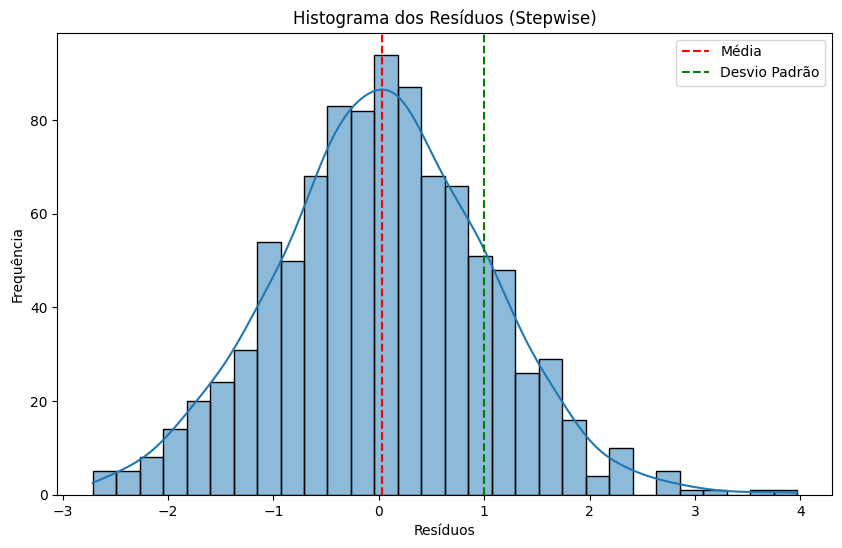

In [35]:

plt.figure(figsize=(10, 6))
sns.histplot(residuos_stepwise, kde=True, bins=30)
plt.axvline(np.mean(residuos_stepwise), color='r', linestyle='--', label='Média')
plt.axvline(np.std(residuos_stepwise), color='g', linestyle='--', label='Desvio Padrão')
plt.title('Histograma dos Resíduos (Stepwise)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [41]:
print(len(y_pred_stepwise_final))
print(len(residuos_stepwise))


3750
3750


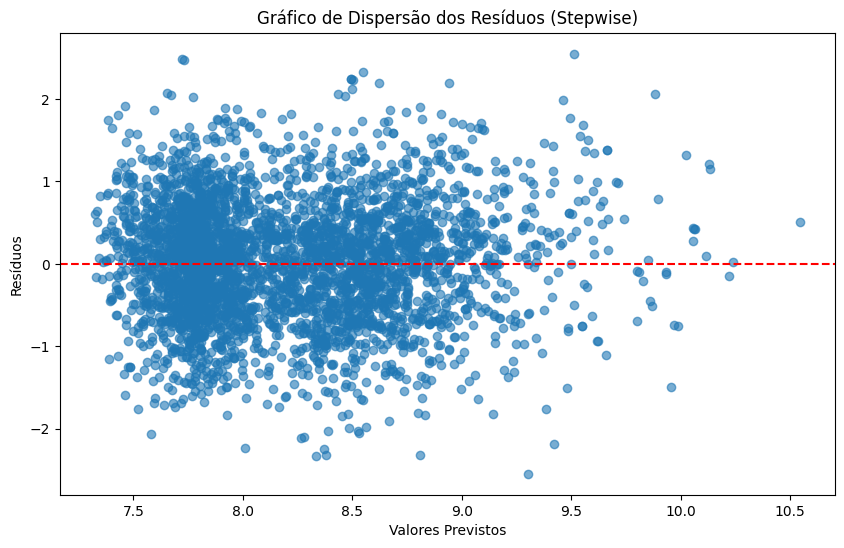

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_stepwise_final, residuos_stepwise, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão dos Resíduos (Stepwise)')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()


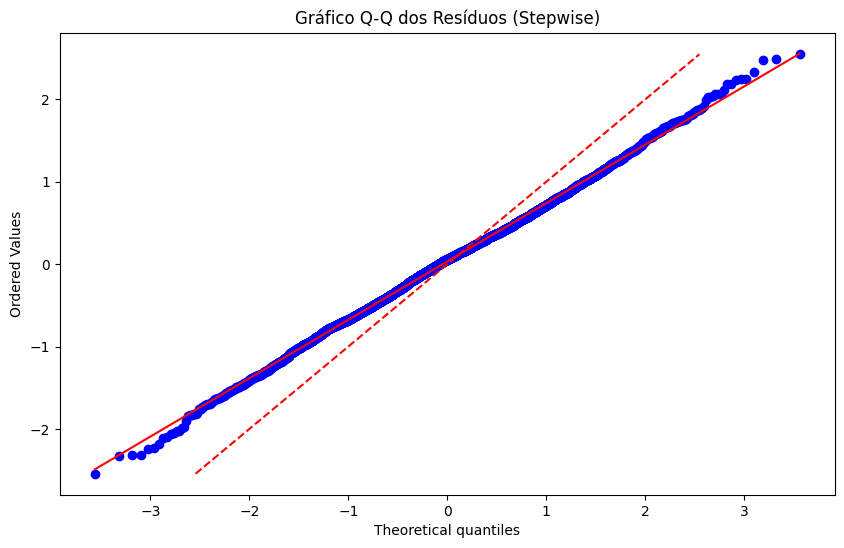

In [43]:
plt.figure(figsize=(10, 6))
probplot(residuos_stepwise, plot=plt)
plt.plot([min(residuos_stepwise), max(residuos_stepwise)], [min(residuos_stepwise), max(residuos_stepwise)], 'r--')
plt.title('Gráfico Q-Q dos Resíduos (Stepwise)')
plt.show()



O modelo stepwise com as características selecionadas obteve um R2 de aproximadamente 0.351 na base de testes. As variáveis incluídas no modelo final são:

'tempo_emprego'
'sexo_M'
'tipo_renda_Pensionista'
'tipo_renda_Empresário'
'educacao_Superior completo'
'posse_de_imovel_True'
'idade'
'posse_de_veiculo_True'

Parece que o modelo não conseguiu incluir as novas variáveis transformadas ('idade_squared', 'tempo_emprego_squared', 'idade_tempo_emprego'). Isso pode indicar que essas variáveis não são estatisticamente significativas quando comparadas às outras.

In [25]:
# Definindo o modelo de árvore de decisão
tree_regressor = DecisionTreeRegressor(random_state=42)

# Criando um pipeline para o modelo de árvore de decisão
# Isso é útil para sequenciar várias etapas de transformações e o modelo final
tree_pipeline = Pipeline(steps=[('preprocessador', preprocessor_new),  # Pré-processador definido anteriormente
                                ('regressor', tree_regressor)])  # Modelo de regressão

# Treinando o modelo com o conjunto de treinamento
tree_pipeline.fit(X_train_new, y_train_new)

# Realizando previsões no conjunto de teste
y_pred_tree = tree_pipeline.predict(X_test_new)

# Calculando o R^2 para as previsões no conjunto de teste
r2_test_tree = r2_score(y_test_new, y_pred_tree)

# Exibindo o R^2 calculado
r2_test_tree

-0.022644958113813285

O modelo de árvore de regressão resultou em um R 2
  de aproximadamente 0.022 na base de testes. Um valor negativo de R 2 indica que o modelo não se ajusta bem aos dados e está realizando previsões piores do que um modelo horizontal simples (uma linha horizontal que representa a média das observações).

---

# Conclusão

Neste projeto, exploramos diferentes abordagens para modelar a previsão de renda usando um conjunto de dados com diversas variáveis, incluindo variáveis numéricas e categóricas. As técnicas de modelagem empregadas foram:

1. Regressão Linear com Regularização LASSO:

   Os modelos LASSO mostraram um R 2 de aproximadamente 0.35 na base de testes, variando ligeiramente com diferentes valores do parâmetro de regularização (α).

2. Regressão Linear com Regularização Ridge:

   Os modelos Ridge apresentaram um comportamento semelhante aos modelos LASSO, com R 2 também em torno de 0.35.

3. Seleção de Características com Stepwise:

   O modelo resultante da seleção stepwise teve um desempenho comparável aos modelos regularizados, com um R 2 de cerca de 0.35.

4. Árvore de Regressão:

   A árvore de regressão não se ajustou bem aos dados, resultando em um R 2 negativo tanto na base original quanto na base transformada.

   A partir dessas análises, concluí que os modelos lineares regularizados e o modelo construído através da seleção stepwise tiveram desempenhos semelhantes e superiores ao modelo de árvore de regressão para este conjunto de dados.

Ainda que o R 2 de aproximadamente 0.35 indique que há espaço para melhorias, esses modelos capturam uma quantidade significativa da variabilidade nos dados e podem servir como um bom ponto de partida para modelos mais complexos.